In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [74]:
#read datasets from url 
url = 'https://raw.githubusercontent.com/rashida048/Datasets/master/nhanes_2015_2016.csv'
df = pd.read_csv(url)
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


### Frequency Distrubutation 

In [75]:
#frequency distributation of dmd deuc2 
print(df['DMDEDUC2'].value_counts())
print("\n")
print("**********************************")
print('values counts doest count missing values ')
print("**********************************")

print( "total sum of frequency = ", df['DMDEDUC2'].value_counts().sum())
print("shape  = " , df['DMDEDUC2'].shape[0])
print("total no of null values" , df['DMDEDUC2'].isnull().sum())
print("\nlets check ")
print('shape - dmdedu values == no of null values'  , df['DMDEDUC2'].shape[0] -df['DMDEDUC2'].value_counts().sum() == df['DMDEDUC2'].isnull().sum() )


DMDEDUC2
4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: count, dtype: int64


**********************************
values counts doest count missing values 
**********************************
total sum of frequency =  5474
shape  =  5735
total no of null values 261

lets check 
shape - dmdedu values == no of null values True


In [76]:
df['DMDEDUC_X']  = df['DMDEDUC2'].replace(to_replace=[1 , 2 , 3 , 4 , 5  ,  7  , 9  ] ,
                       value = ["9" ,"9-11"  , "HS/GED" , 
                                "Some college/AA" , "College" , "Refused", "Don't know" ])

In [77]:
df['DMDEDUC_X'].value_counts()

DMDEDUC_X
Some college/AA    1621
College            1366
HS/GED             1186
9                   655
9-11                643
Don't know            3
Name: count, dtype: int64

In [78]:
print(df['RIAGENDR'].unique())
df['RIAGENDR'].sample(3)

[1 2]


264     2
1824    1
208     2
Name: RIAGENDR, dtype: int64

relabel gender encoded values 

In [79]:
df['RIAGENDR_X'] =df['RIAGENDR'].replace({1:'Male' , 2:'Female'})

In [80]:
df['RIAGENDR_X']

0         Male
1         Male
2         Male
3       Female
4       Female
         ...  
5730    Female
5731      Male
5732    Female
5733      Male
5734    Female
Name: RIAGENDR_X, Length: 5735, dtype: object

Converting values into proportion

In [81]:
X = df.DMDEDUC_X.value_counts()
X  = X / X.sum()
X

DMDEDUC_X
Some college/AA    0.296127
College            0.249543
HS/GED             0.216661
9                  0.119657
9-11               0.117464
Don't know         0.000548
Name: count, dtype: float64

In [82]:
df['DMDEDUC_X'].fillna(value = "Missing" , inplace= True )

/tmp/ipykernel_12425/3774895675.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DMDEDUC_X'].fillna(value = "Missing" , inplace= True )


In [83]:
X = df['DMDEDUC_X'].value_counts()
X = X/X.sum()
X

DMDEDUC_X
Some college/AA    0.282650
College            0.238187
HS/GED             0.206800
9                  0.114211
9-11               0.112119
Missing            0.045510
Don't know         0.000523
Name: count, dtype: float64

###  Numerical Summaries

In [84]:
#total no of null value
print('total null values of bmxwt ' , df['BMXWT'].isnull().sum() )

#remove  null value and describe 
df['BMXWT'].dropna().describe()

total null values of bmxwt  69


count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64

### calculating each of those values 

In [85]:
x = df["BMXWT"].dropna() 
print(x.count())
print(x.mean())
print(x.std())
print(x.min())
print(np.percentile(x , 25))
print(np.percentile(x , 50))
print(np.percentile(x , 75))
print(x.max())



5666
81.34267560889516
21.764409359003896
32.4
65.9
78.2
92.7
198.9


systolic blood pressure measurement

In [86]:
df[(df.BPXSY1 >= 120) & (df.BPXSY1 <= 139)]['BPXSY1']

0       128.0
2       138.0
3       132.0
7       120.0
13      124.0
        ...  
5709    132.0
5715    124.0
5718    128.0
5724    132.0
5726    132.0
Name: BPXSY1, Length: 2104, dtype: float64

### Graphical summries 

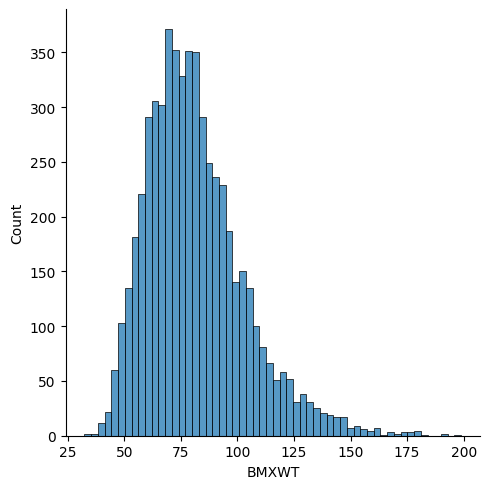

In [87]:
sns.displot(df.BMXWT.dropna())

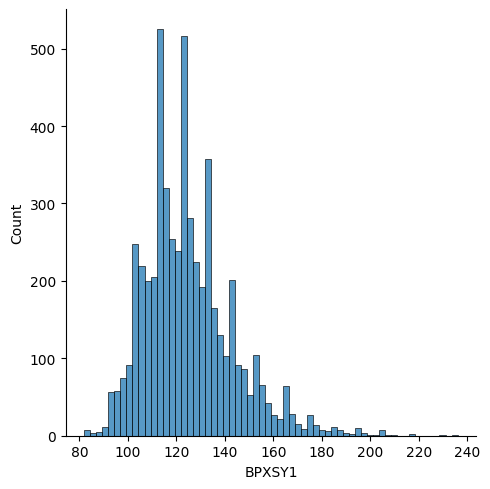

In [88]:
sns.displot(df.BPXSY1.dropna())

/home/ujjwal/.conda/envs/test/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/ujjwal/.conda/envs/test/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/ujjwal/.conda/envs/test/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/ujjwal/.conda/envs/test/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWar

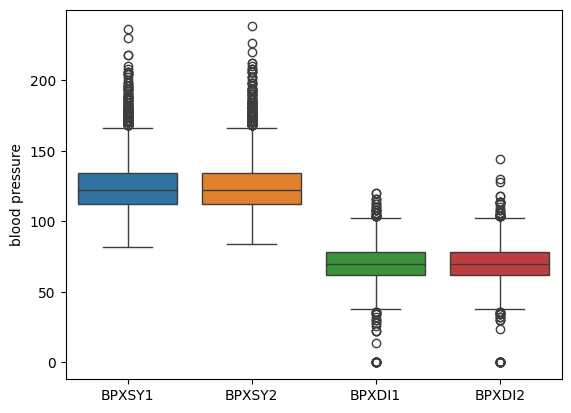

In [89]:
bp = sns.boxplot(data  = df.loc[: ,["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]])
_ = bp.set_ylabel("blood pressure")


In [90]:
df.RIDAGEYR.unique()


array([62, 53, 78, 56, 42, 72, 22, 32, 18, 46, 45, 30, 67, 57, 19, 24, 27,
       54, 49, 80, 69, 58, 60, 51, 68, 66, 37, 29, 20, 70, 23, 61, 39, 50,
       44, 71, 31, 41, 35, 21, 40, 48, 63, 79, 38, 74, 26, 55, 52, 47, 43,
       75, 33, 28, 65, 25, 73, 36, 64, 59, 77, 76, 34])

In [91]:
#strafication 
df["agegrp"] = pd.cut(x = df.RIDAGEYR , bins = [18 , 30 , 40 , 50 , 60 , 70 , 80 , 90 ] )

<Axes: xlabel='agegrp', ylabel='count'>

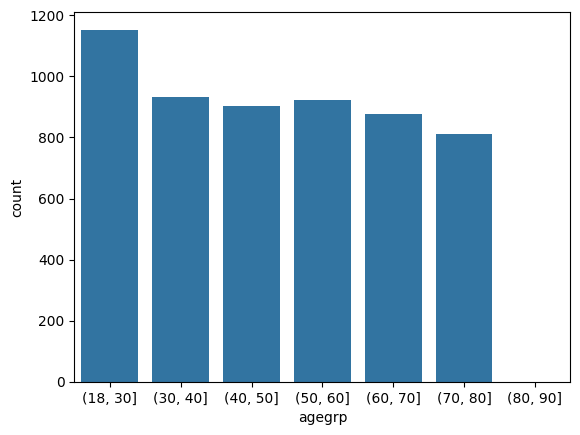

In [92]:
sns.countplot(x = df['agegrp'] , )

/home/ujjwal/.conda/envs/test/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


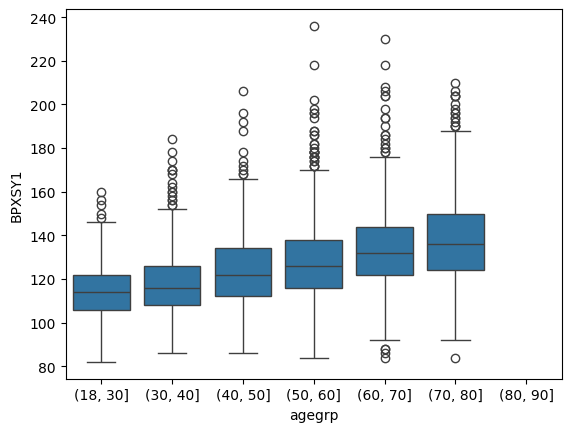

In [93]:
sns.boxplot(x="agegrp", y="BPXSY1", data=df )  # Make boxplot of BPXSY1 stratified by age group
plt.show()

In [94]:
#THE ABOVE PLOTS CLEARLY SHOW'S THAT THE SYSTOLIC BOLOOD PRESSURE INCREASE WITH INCREASE IN AGE , 
df['RIAGENDR'] = df['RIAGENDR'].map({1:'Male' , 2 : 'Female' })

/home/ujjwal/.conda/envs/test/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/ujjwal/.conda/envs/test/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/ujjwal/.conda/envs/test/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/ujjwal/.conda/envs/test/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWar

<Axes: xlabel='agegrp', ylabel='BPXSY1'>

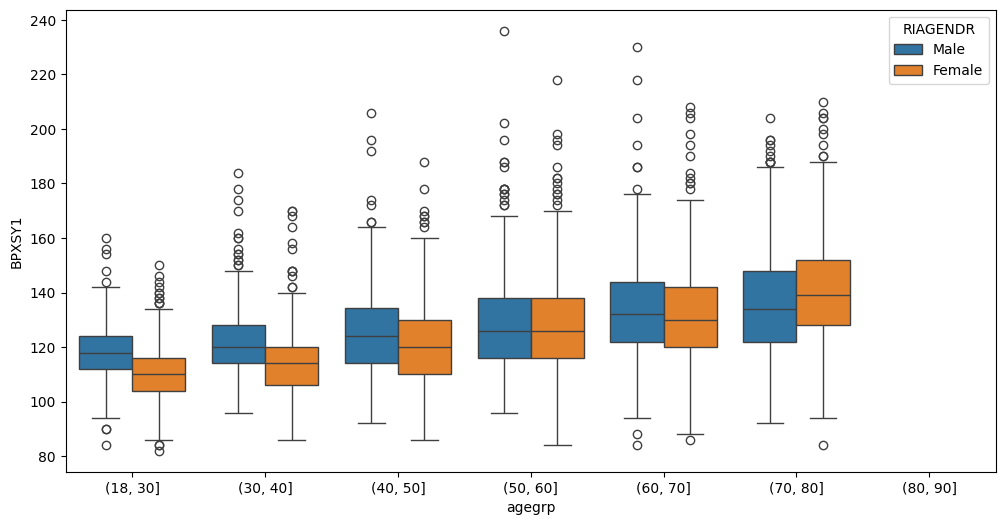

In [95]:
plt.figure(figsize= (12 , 6 ) )
sns.boxplot(x="agegrp", y="BPXSY1", data=df , hue = df['RIAGENDR'] )  # Make boxplot of BPXSY1 stratified by age group


In [97]:
#its looks like more no of suffere at younage of bpxysy then female  , and on adged , more female suffere from bpxys1 then mael ,
#this may be because  , certain death or treatment of male of bpxysy in young-age

In [99]:
df['agegrp'] = pd.cut[df.RIDAGEYR  , [18 , 30 , 40 , 50 ,60 , 70 , 80]]

TypeError: 'function' object is not subscriptable

In [110]:
df['agegrp'] = pd.cut(x = df['RIDAGEYR'] ,  bins = [18 , 30 , 40 , 50 ,60 , 70 , 80 ])


In [121]:
df.RIDAGEYR	.isnull().count()


5735

<Axes: xlabel='RIAGENDR_X', ylabel='BPXSY1'>

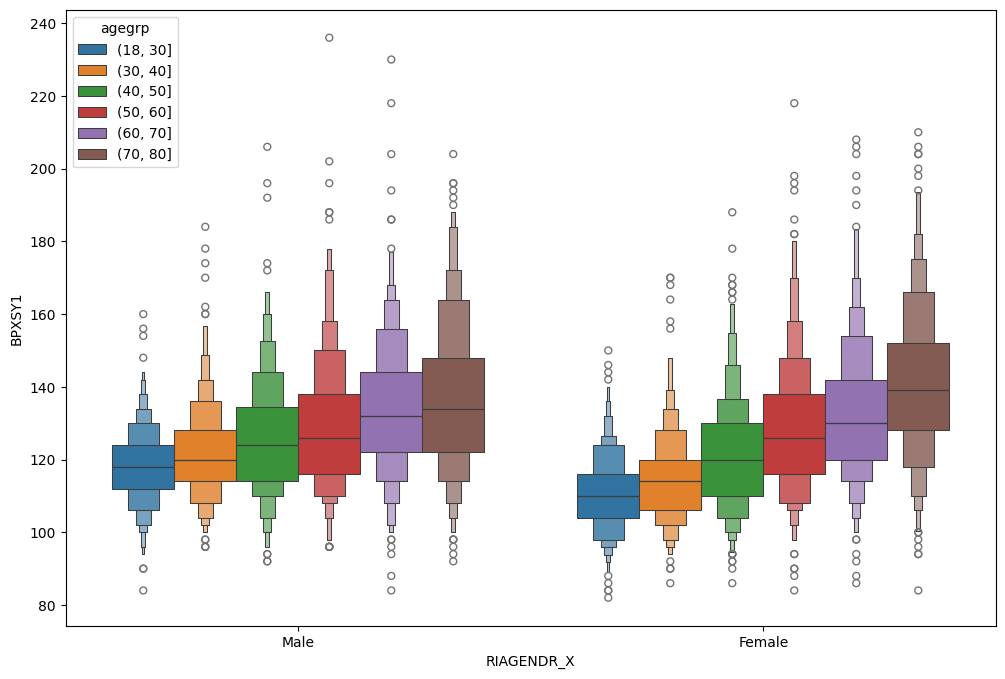

In [130]:
plt.figure(figsize = (12 , 8 ))
sns.boxenplot(data  = df , x= 'RIAGENDR_X', y = 'BPXSY1' ,  hue = 'agegrp'  )

In [120]:
df.RIDAGEYR	.isnull().count()

5735